<a href="https://colab.research.google.com/github/Fenysepthalia/TemuKembaliCitra_2018-049_2018-050/blob/main/Tugas3_Open%20CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama Kelompok :**

### **Feny Septhalia Insyira Putri 201810370311049**

### **Laofin Aripa 201810370311050**

# **Arithmetic**

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files
%matplotlib inline

In [30]:
uploaded = files.upload()

Saving IM-0037-0001.jfif to IM-0037-0001.jfif


In [31]:
# Import the image
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [33]:
args = {
	"image": "IM-0037-0001.jfif"
}

In [34]:
added = cv2.add(np.uint8([150]), np.uint8([100]))
subtracted = cv2.subtract(np.uint8([100]), np.uint8([200]))
print("max of 255: {}".format(added))
print("min of 0: {}".format(subtracted))

max of 255: [[250]]
min of 0: [[0]]


In [35]:
added = np.uint8([50]) + np.uint8([100])
subtracted = np.uint8([75]) - np.uint8([100])
print("wrap around: {}".format(added))
print("wrap around: {}".format(subtracted))

wrap around: [150]
wrap around: [231]


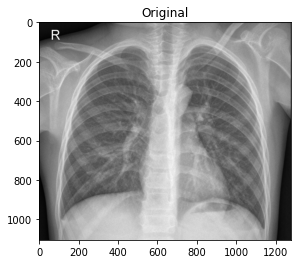

In [36]:
image = cv2.imread(args["image"])
plt_imshow("Original", image)

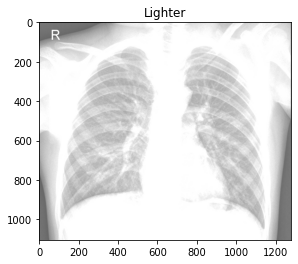

In [37]:
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)
plt_imshow("Lighter", added)

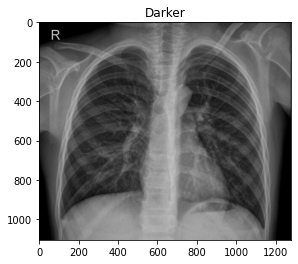

In [38]:
M = np.ones(image.shape, dtype="uint8") * 50
subtracted = cv2.subtract(image, M)
plt_imshow("Darker", subtracted)

# **Cropping**

In [39]:
I = np.arange(0, 25)
I

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [40]:
I = I.reshape((5, 5))
I

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [41]:
I[0:5, 0:2]

array([[ 0,  1],
       [ 5,  6],
       [10, 11],
       [15, 16],
       [20, 21]])

In [42]:
I[3:5, 1:5]

array([[16, 17, 18, 19],
       [21, 22, 23, 24]])

In [45]:
args = {
	"image": "IM-0037-0001.jfif"
}

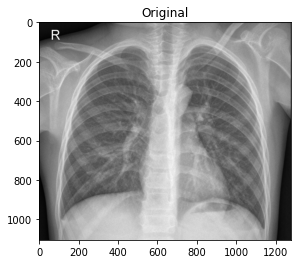

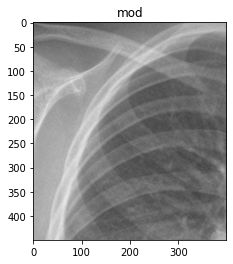

In [46]:
image = cv2.imread(args["image"])
plt_imshow("Original", image)

No_findings = image[100:550, 100:500]
plt_imshow("mod", No_findings)

# **Drawing**

In [47]:
canvas = np.zeros((250, 250, 3), dtype="uint8")

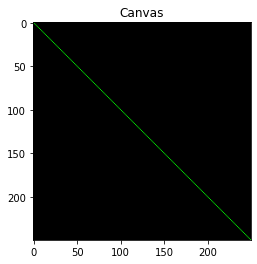

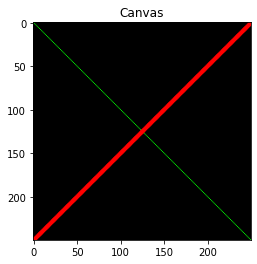

In [48]:
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (250, 250), green)
plt_imshow("Canvas", canvas)

red = (0, 0, 255)
cv2.line(canvas, (250, 0), (0, 250), red, 3)
plt_imshow("Canvas", canvas)

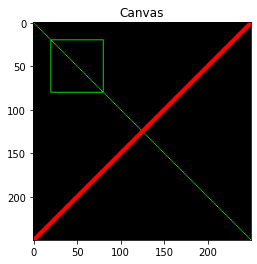

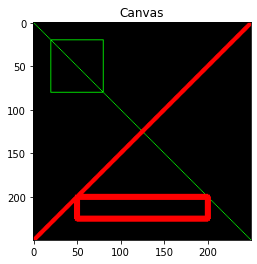

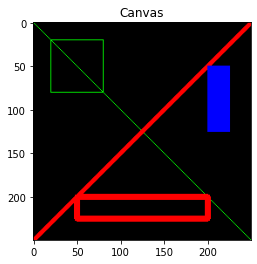

In [49]:
cv2.rectangle(canvas, (20, 20), (80, 80), green)
plt_imshow("Canvas", canvas)

cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
plt_imshow("Canvas", canvas)

blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
plt_imshow("Canvas", canvas)

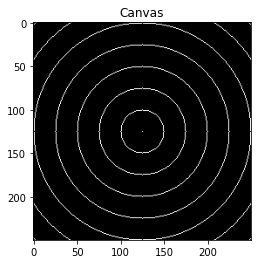

In [50]:
canvas = np.zeros((250, 250, 3), dtype="uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

for r in range(0, 255, 25):
	cv2.circle(canvas, (centerX, centerY), r, white)

plt_imshow("Canvas", canvas)

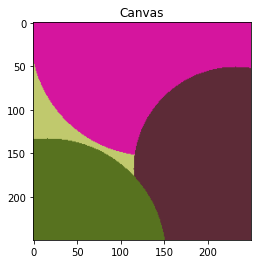

In [51]:
canvas = np.zeros((250, 250, 3), dtype="uint8")

for i in range(0, 25):

	radius = np.random.randint(5, high=200)
	color = np.random.randint(0, high=256, size=(3,)).tolist()
	pt = np.random.randint(0, high=300, size=(2,))

	cv2.circle(canvas, tuple(pt), radius, color, -1)

plt_imshow("Canvas", canvas)

In [53]:
args = {
	"image": "IM-0037-0001.jfif"
}

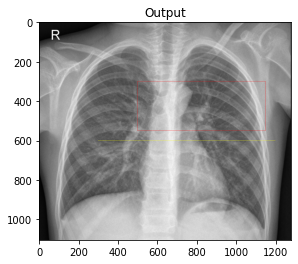

In [54]:
image = cv2.imread(args["image"])

cv2.rectangle(image, (300, 600), (1200, 600), (0, 255, 255), -1)
cv2.rectangle(image, (500, 300), (1150, 550), (0, 0, 255), 1)

plt_imshow("Output", image)

# **Flipping**

In [55]:
args = {
	"image": "IM-0037-0001.jfif"
}

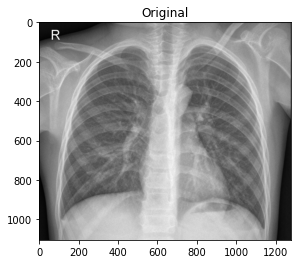

[INFO] flipping image horizontally...


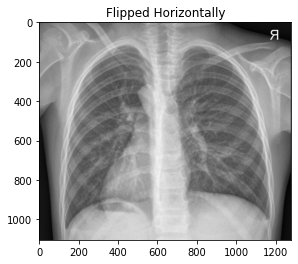

In [56]:
image = cv2.imread(args["image"])
plt_imshow("Original", image)

print("[INFO] flipping image horizontally...")
flipped = cv2.flip(image, 1)
plt_imshow("Flipped Horizontally", flipped)

[INFO] flipping image vertically...


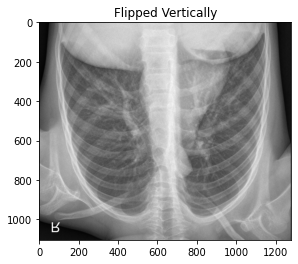

In [57]:
flipped = cv2.flip(image, 0)
print("[INFO] flipping image vertically...")
plt_imshow("Flipped Vertically", flipped)

[INFO] flipping image horizontally and vertically...


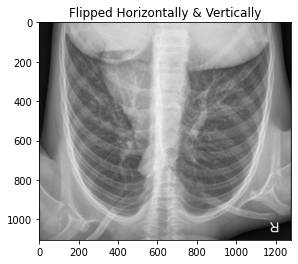

In [58]:
flipped = cv2.flip(image, -1)
print("[INFO] flipping image horizontally and vertically...")
plt_imshow("Flipped Horizontally & Vertically", flipped)

# **Masking**

In [59]:
args = {
	"image": "IM-0037-0001.jfif"
}

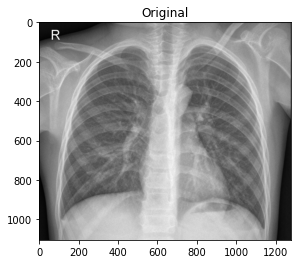

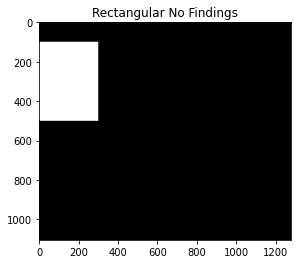

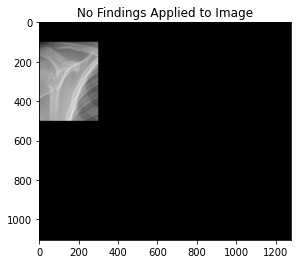

In [60]:
image = cv2.imread(args["image"])
plt_imshow("Original", image)

mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 100), (300, 500), 255, -1)
plt_imshow("Rectangular No Findings", mask)

masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("No Findings Applied to Image", masked)

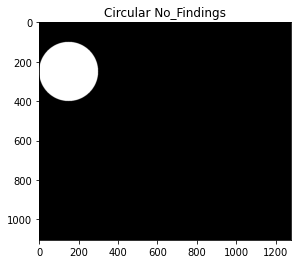

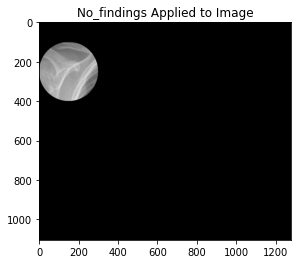

In [61]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (150, 250), 150, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

plt_imshow("Circular No_Findings", mask)
plt_imshow("No_findings Applied to Image", masked)

# **Pixel**

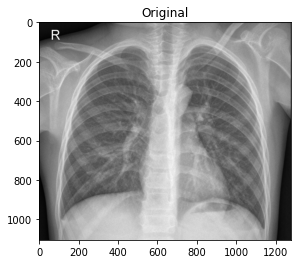

In [62]:
image = cv2.imread(args["image"])
(h, w) = image.shape[:2] 
plt_imshow("Original", image)

In [63]:
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

image[20, 50] = (0, 0, 255)
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 2, Green: 2, Blue: 2
Pixel at (50, 20) - Red: 16, Green: 16, Blue: 16
Pixel at (50, 20) - Red: 255, Green: 0, Blue: 0


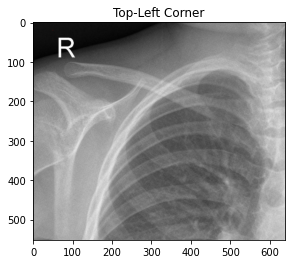

In [64]:
(cX, cY) = (w // 2, h // 2)

tl = image[0:cY, 0:cX]
plt_imshow("Top-Left Corner", tl)

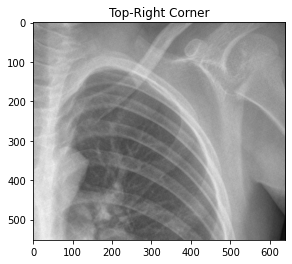

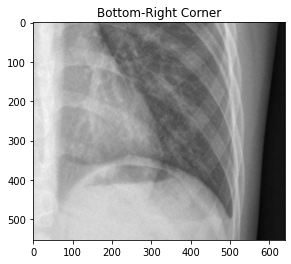

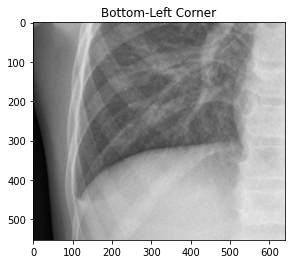

In [65]:
tr = image[0:cY, cX:w]
br = image[cY:h, cX:w]
bl = image[cY:h, 0:cX]
plt_imshow("Top-Right Corner", tr)
plt_imshow("Bottom-Right Corner", br)
plt_imshow("Bottom-Left Corner", bl)

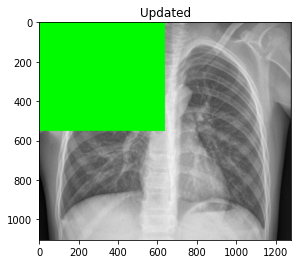

In [66]:
image[0:cY, 0:cX] = (0, 250, 0)

plt_imshow("Updated", image)

# **Read and Write Image**

In [68]:
image = cv2.imread(args["image"])
(h, w, c) = image.shape[:3]

print("width: {} pixels".format(image.shape[1]))
print("height: {}  pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))

width: 1280 pixels
height: 1105  pixels
channels: 3


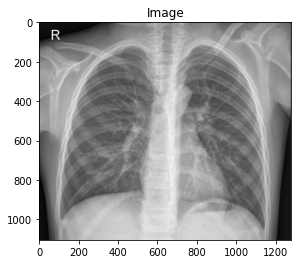

True

In [70]:
plt_imshow("Image", image)
cv2.imwrite("covid_x-ray_new.jpg", image)

In [71]:
import imutils

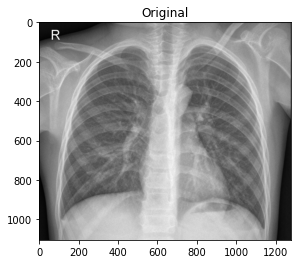

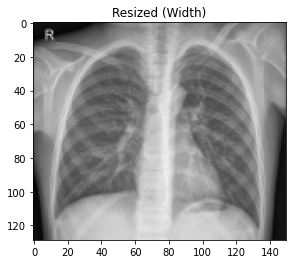

In [72]:
image = cv2.imread(args["image"])
plt_imshow("Original", image)


r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Width)", resized)

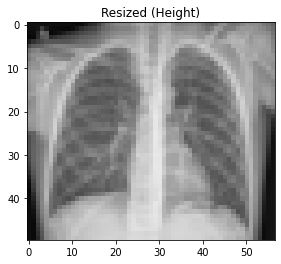

In [73]:
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Height)", resized)

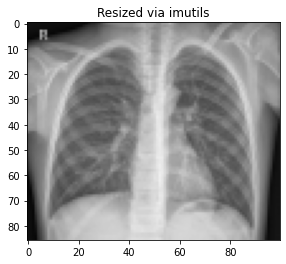

In [74]:
resized = imutils.resize(image, width=100)
plt_imshow("Resized via imutils", resized)

[INFO] cv2.INTER_NEAREST


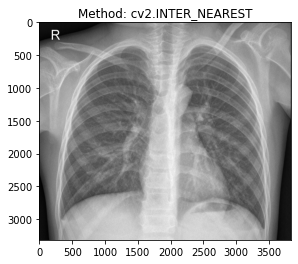

[INFO] cv2.INTER_LINEAR


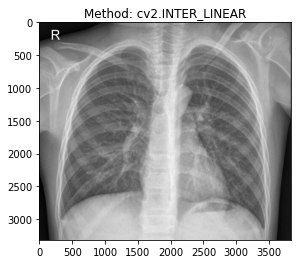

[INFO] cv2.INTER_AREA


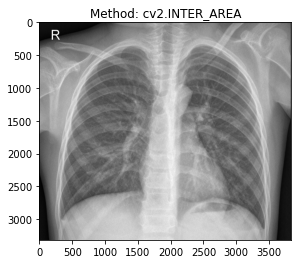

[INFO] cv2.INTER_CUBIC


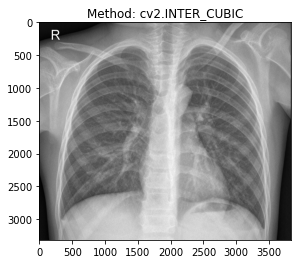

[INFO] cv2.INTER_LANCZOS4


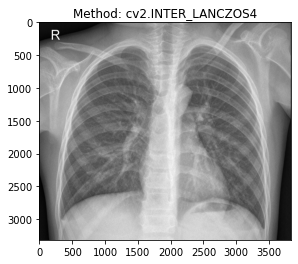

In [75]:
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
	("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
	("cv2.INTER_AREA", cv2.INTER_AREA),
	("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
	("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

# loop over the interpolation methods
for (name, method) in methods:
	# increase the size of the image by 3x using the current
	# interpolation method
	print("[INFO] {}".format(name))
	resized = imutils.resize(image, width=image.shape[1] * 3,
		inter=method)
	plt_imshow("Method: {}".format(name), resized)

# **Rotasi** 

---



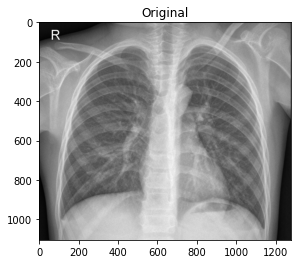

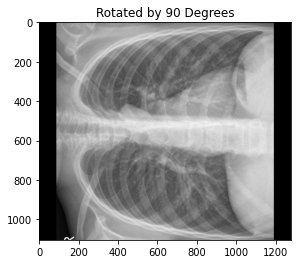

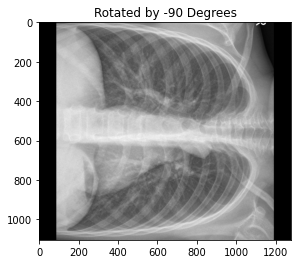

In [84]:
image = cv2.imread(args["image"])
plt_imshow("Original", image)

(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)

M = cv2.getRotationMatrix2D((cX, cY), 90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by 90 Degrees", rotated)

M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by -90 Degrees", rotated)

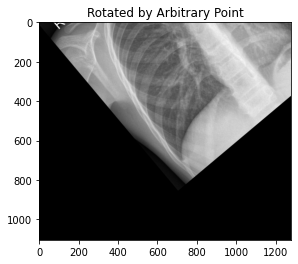

In [81]:
M = cv2.getRotationMatrix2D((10, 10), 40, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by Arbitrary Point", rotated)

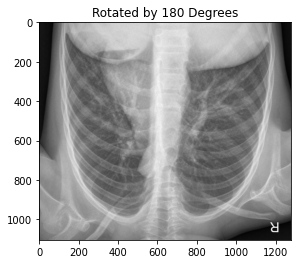

In [82]:
rotated = imutils.rotate(image, 180)
plt_imshow("Rotated by 180 Degrees", rotated)

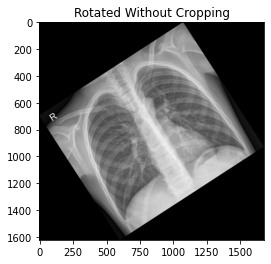

In [83]:
rotated = imutils.rotate_bound(image, -33)
plt_imshow("Rotated Without Cropping", rotated)

# **Split Marge**

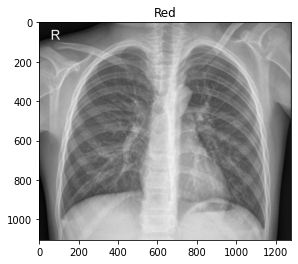

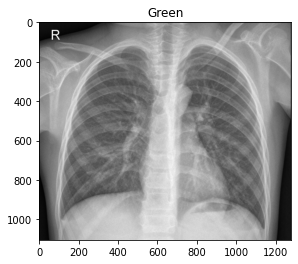

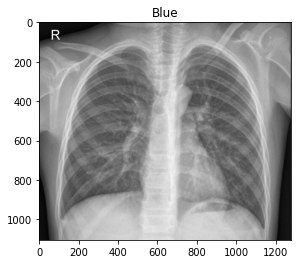

In [85]:
image = cv2.imread(args["image"])
(B, G, R) = cv2.split(image)

# show each channel individually
plt_imshow("Red", R)
plt_imshow("Green", G)
plt_imshow("Blue", B)

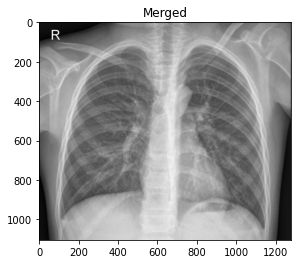

In [86]:
merged = cv2.merge([B, G, R])
plt_imshow("Merged", merged)

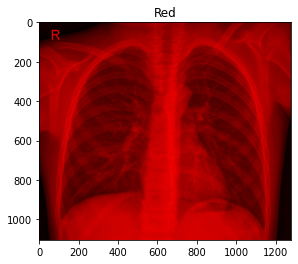

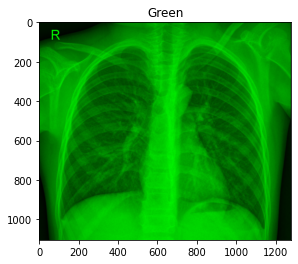

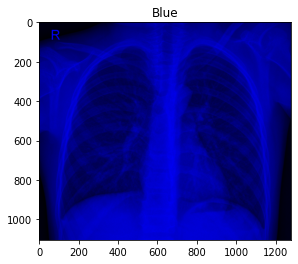

In [87]:
import numpy as np
zeros = np.zeros(image.shape[:2], dtype="uint8")
plt_imshow("Red", cv2.merge([zeros, zeros, R]))
plt_imshow("Green", cv2.merge([zeros, G, zeros]))
plt_imshow("Blue", cv2.merge([B, zeros, zeros]))

# **Translat**e

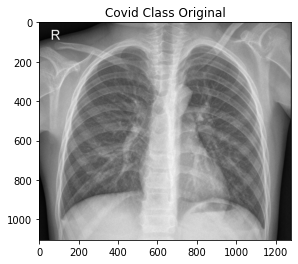

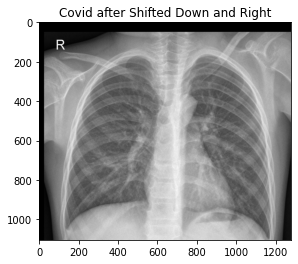

In [88]:
image = cv2.imread(args["image"])
plt_imshow("Covid Class Original", image)

M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Covid after Shifted Down and Right", shifted)

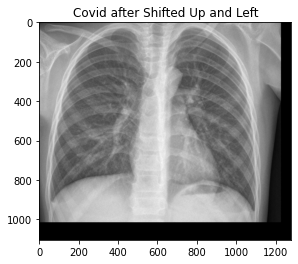

In [89]:
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Covid after Shifted Up and Left", shifted)

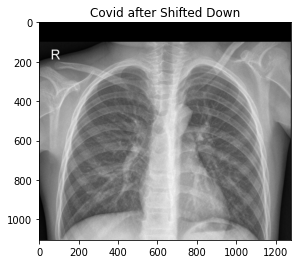

In [90]:
shifted = imutils.translate(image, 0, 100)
plt_imshow("Covid after Shifted Down", shifted)